In [10]:
%matplotlib inline
from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_excel(r"C:\Users\Aufar\Desktop\edm\Podes.xlsx")

#df.head(77961)

dataDaerah = df[['KODE_PROV', 'NAMA_PROV', 'KODE_KAB', 'NAMA_KAB', 'KODE_KEC','NAMA_KEC','KODE_DESA','NAMA_DESA']]
dataAnalysis = df[['R401C', 'R401D', 'R501A', 'R501B', 'R701BK2', 'R701BK3', 'R701CK2', 'R701CK3', 
                   'R701DK2', 'R701EK2', 'R701EK3']]

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

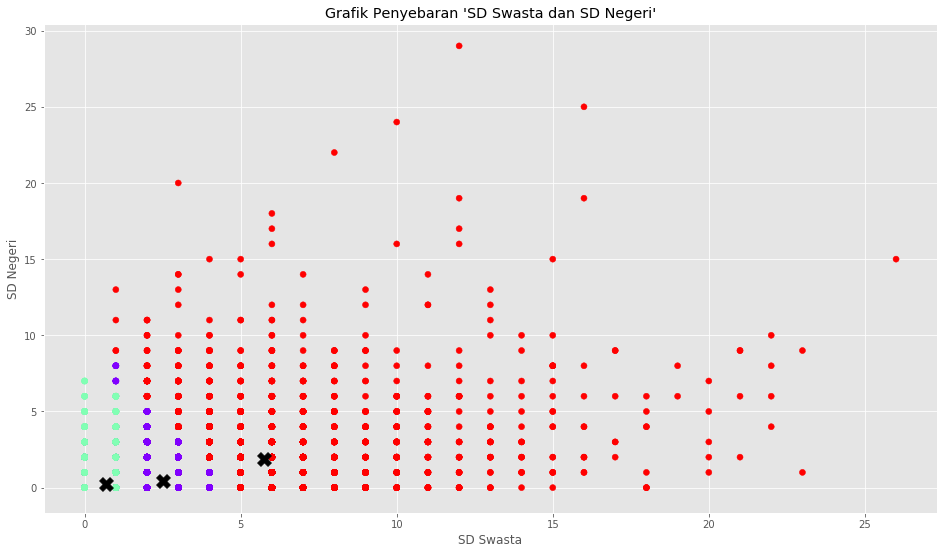

In [6]:
SDswasta = dataAnalysis['R701BK2'].values
SDnegeri = dataAnalysis['R701BK3'].values
temp = np.array(list(zip(SDswasta, SDnegeri)))

kmeans = KMeans(n_clusters=3)  
kmeans.fit(temp)  

plt.title("Grafik Penyebaran 'SD Swasta dan SD Negeri'")
plt.xlabel("SD Swasta")
plt.ylabel("SD Negeri")

plt.scatter(temp[:,0],temp[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="X", s=200)  

In [7]:
SDswasta1 = temp[:,0] 
SDnegeri1 = temp[:,1] 
Labels = kmeans.labels_ 

tempSwasta = []
tempNegeri = []
label = []
index = 0


for i in Labels :
    if(i == 0):
        tempSwasta.append(SDswasta1[index]) 
        tempNegeri.append(SDnegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Mencukupi')
    elif(i == 1):
        tempSwasta.append(SDswasta1[index]) 
        tempNegeri.append(SDnegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Kurang')
    else :
        tempSwasta.append(SDswasta1[index]) 
        tempNegeri.append(SDnegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Banyak')
    
    index += 1 

FinalSD = pd.DataFrame({"SD Swasta": tempSwasta, "SD Negeri": tempNegeri, "Label": label})
transaksi = np.array(FinalSD)
urut = transaksi[transaksi[:,0].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
FinalSD = pd.DataFrame(urut)
FinalSD.columns = ['SD Swasta', 'SD Negeri','Label']
# FinalSD.head(77961)

penyebaranSD = df[['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA', 'R701BK2', 'R701BK3']]
transaksi = np.array(penyebaranSD)
urut = transaksi[transaksi[:,4].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSD = pd.DataFrame(urut)
x = np.array(FinalSD['Label']) 
penyebaranSD['Label'] = x
transaksi = np.array(penyebaranSD)
urut = transaksi[transaksi[:,0].argsort()[::1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSD = pd.DataFrame(urut)
penyebaranSD.columns = [['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA',
                         'R701BK2 (SD Swasta)','R701BK3 (SD Negeri)', 'Label']]
penyebaranSD.head(50000)


,KODE_PROV,NAMA_PROV,KODE_DESA,NAMA_DESA,R701BK2 (SD Swasta),R701BK3 (SD Negeri),Label
0,11,NANGGROE ACEH DARUSSALAM,19,KUALA LEUGE,1,0,Kurang
1,11,NANGGROE ACEH DARUSSALAM,24,SIMPANG ANTARA,0,0,Kurang
2,11,NANGGROE ACEH DARUSSALAM,7,KERLANG,0,0,Kurang
3,11,NANGGROE ACEH DARUSSALAM,14,AYU ARA,0,0,Kurang
4,11,NANGGROE ACEH DARUSSALAM,2,PAYA TERBANG,0,0,Kurang
5,11,NANGGROE ACEH DARUSSALAM,28,MEKAR AYU,0,0,Kurang
6,11,NANGGROE ACEH DARUSSALAM,24,MATANG JANENG,0,0,Kurang
7,11,NANGGROE ACEH DARUSSALAM,3,BINTANG BENER,0,0,Kurang
8,11,NANGGROE ACEH DARUSSALAM,27,RATA MULIE,0,0,Kurang
9,11,NANGGROE ACEH DARUSSALAM,4,MEUDANG GHON,0,0,Kurang


Penyebaran Sekolah SD Negeri dan Swasta di Indonesia : 


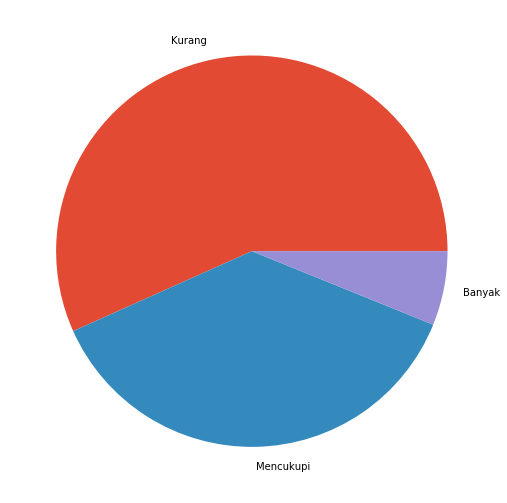

Presentase :
Kurang : 56.7%
Mencukupi : 37.17%
Banyak : 6.13%


In [8]:
x = np.array(penyebaranSD['Label'])
kurang = 0
cukup = 0
banyak = 0
for i in x :
    if(i == 'Kurang'):
        kurang += 1;
    elif(i == 'Mencukupi'):
        cukup += 1;
    else:
        banyak += 1;
        

persentaseSD = [kurang, cukup, banyak]
label = ['Kurang', 'Mencukupi', 'Banyak']
total = kurang + cukup + banyak
kurang = "Kurang : " + str(round(((kurang/total)*100),2)) + "%"
cukup = "Mencukupi : "+ str(round(((cukup/total)*100),2)) + "%"
banyak = "Banyak : " + str(round(((banyak/total)*100),2)) + "%"


print("Penyebaran Sekolah SD Negeri dan Swasta di Indonesia : ")
plt.pie(persentaseSD, labels=label)
plt.show()
print("Presentase :")
print(kurang)
print(cukup)
print(banyak)

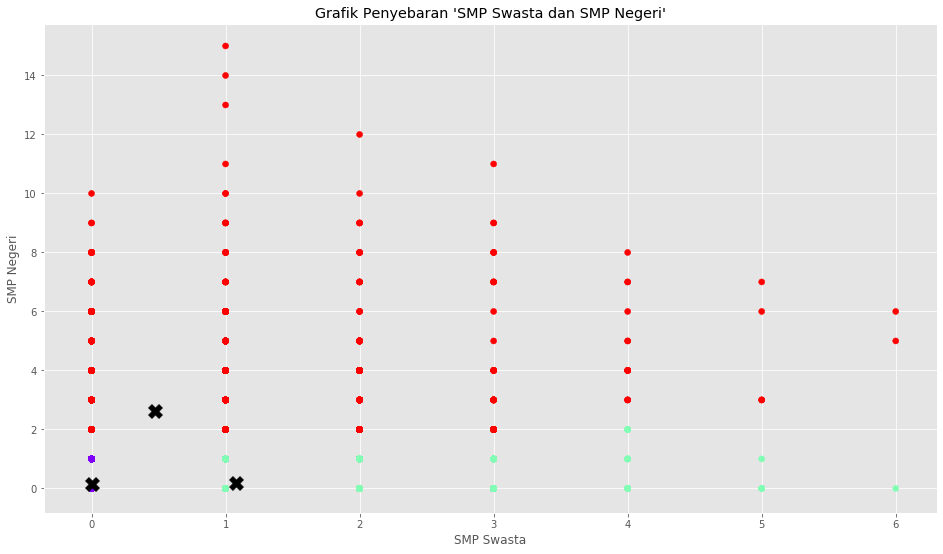

In [19]:
smpSwasta = dataAnalysis['R701CK2'].values
smpNegeri = dataAnalysis['R701CK3'].values
temp = np.array(list(zip(smpSwasta, smpNegeri)))

kmeans = KMeans(n_clusters=3)  
kmeans.fit(temp)  

plt.title("Grafik Penyebaran 'SMP Swasta dan SMP Negeri'")
plt.xlabel("SMP Swasta")
plt.ylabel("SMP Negeri")

plt.scatter(temp[:,0],temp[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="X", s=200)  

In [21]:
smpSwasta1 = temp[:,0] 
smpNegeri1 = temp[:,1] 
Labels = kmeans.labels_ 

tempSwasta = []
tempNegeri = []
label = []
index = 0


for i in Labels :
    if(i == 0):
        tempSwasta.append(smpSwasta1[index]) 
        tempNegeri.append(smpNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Kurang')
    elif(i == 1):
        tempSwasta.append(smpSwasta1[index]) 
        tempNegeri.append(smpNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Mencukupi')
    else :
        tempSwasta.append(smpSwasta1[index]) 
        tempNegeri.append(smpNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Banyak')
    
    index += 1 

FinalSMP = pd.DataFrame({"SMP Swasta": tempSwasta, "SMP Negeri": tempNegeri, "Label": label})
transaksi = np.array(FinalSMP)
urut = transaksi[transaksi[:,0].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
FinalSMP = pd.DataFrame(urut)
FinalSMP.columns = ['SMP Swasta', 'SMP Negeri','Label']
# FinalSD.head(77961)

penyebaranSMP = df[['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA', 'R701CK2', 'R701CK3']]
transaksi = np.array(penyebaranSMP)
urut = transaksi[transaksi[:,4].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSMP = pd.DataFrame(urut)
x = np.array(FinalSMP['Label']) 
penyebaranSMP['Label'] = x
transaksi = np.array(penyebaranSMP)
urut = transaksi[transaksi[:,0].argsort()[::1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSMP = pd.DataFrame(urut)
penyebaranSMP.columns = [['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA',
                         'R701CK2 (SMP Swasta)','R701CK3 (SMP Negeri)', 'Label']]
penyebaranSMP.head(50000)


,KODE_PROV,NAMA_PROV,KODE_DESA,NAMA_DESA,R701CK2 (SMP Swasta),R701CK3 (SMP Negeri),Label
0,11,NANGGROE ACEH DARUSSALAM,1,LATIUNG,0,0,Kurang
1,11,NANGGROE ACEH DARUSSALAM,16,KUTA TENGAH,0,0,Kurang
2,11,NANGGROE ACEH DARUSSALAM,14,KEDATARAN GAB,0,0,Kurang
3,11,NANGGROE ACEH DARUSSALAM,35,PANTE,1,0,Mencukupi
4,11,NANGGROE ACEH DARUSSALAM,13,GABUNGAN PARSAORAN,0,0,Kurang
5,11,NANGGROE ACEH DARUSSALAM,12,LAWE LONING AMAN,0,0,Kurang
6,11,NANGGROE ACEH DARUSSALAM,11,LAWE LONING GAB,0,0,Kurang
7,11,NANGGROE ACEH DARUSSALAM,15,SALIM PINIM II,0,0,Kurang
8,11,NANGGROE ACEH DARUSSALAM,14,KUTE MEJILE,0,0,Kurang
9,11,NANGGROE ACEH DARUSSALAM,13,JAMBUR PERMATA,0,0,Kurang


Penyebaran Sekolah SMP Negeri dan Swasta di Indonesia : 


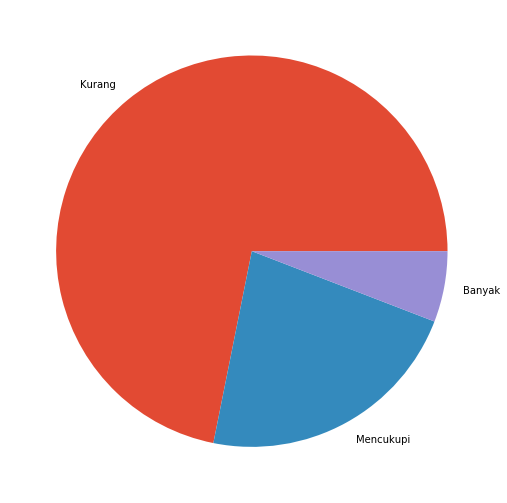

Presentase :
Kurang : 71.85%
Mencukupi : 22.3%
Banyak : 5.85%


In [22]:
x = np.array(penyebaranSMP['Label'])
kurang = 0
cukup = 0
banyak = 0
for i in x :
    if(i == 'Kurang'):
        kurang += 1;
    elif(i == 'Mencukupi'):
        cukup += 1;
    else:
        banyak += 1;
        

persentaseSMP = [kurang, cukup, banyak]
label = ['Kurang', 'Mencukupi', 'Banyak']
total = kurang + cukup + banyak
kurang = "Kurang : " + str(round(((kurang/total)*100),2)) + "%"
cukup = "Mencukupi : "+ str(round(((cukup/total)*100),2)) + "%"
banyak = "Banyak : " + str(round(((banyak/total)*100),2)) + "%"


print("Penyebaran Sekolah SMP Negeri dan Swasta di Indonesia : ")
plt.pie(persentaseSMP, labels=label)
plt.show()
print("Presentase :")
print(kurang)
print(cukup)
print(banyak)

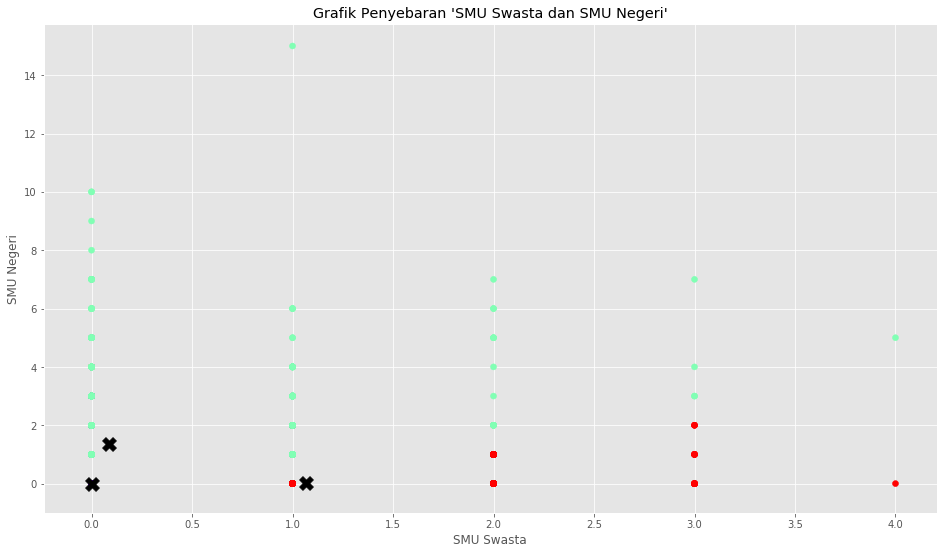

In [23]:
smkSwasta = dataAnalysis['R701EK2'].values
smkNegeri = dataAnalysis['R701EK3'].values
temp = np.array(list(zip(smkSwasta, smkNegeri)))


kmeans = KMeans(n_clusters=3)  
kmeans.fit(temp)  

plt.title("Grafik Penyebaran 'SMU Swasta dan SMU Negeri'")
plt.xlabel("SMU Swasta")
plt.ylabel("SMU Negeri")

plt.scatter(temp[:,0],temp[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="X", s=200)  

In [24]:
smkSwasta1 = temp[:,0] 
smkNegeri1 = temp[:,1] 
Labels = kmeans.labels_ 

tempSwasta = []
tempNegeri = []
label = []
index = 0


for i in Labels :
    if(i == 0):
        tempSwasta.append(smkSwasta1[index]) 
        tempNegeri.append(smkNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Kurang')
    elif(i == 1):
        tempSwasta.append(smkSwasta1[index]) 
        tempNegeri.append(smkNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Mencukupi')
    else :
        tempSwasta.append(smkSwasta1[index]) 
        tempNegeri.append(smkNegeri1[index]) #ganti jadi tanggal lagi dan masukin ke array
        label.append('Banyak')
    
    index += 1 

FinalSMK = pd.DataFrame({"SMK Swasta": tempSwasta, "SMK Negeri": tempNegeri, "Label": label})
transaksi = np.array(FinalSMK)
urut = transaksi[transaksi[:,0].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
FinalSMK = pd.DataFrame(urut)
FinalSMK.columns = ['SMK Swasta', 'SMK Negeri','Label']
# FinalSK.head(77961)

penyebaranSMK = df[['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA', 'R701EK2', 'R701EK3']]
transaksi = np.array(penyebaranSMK)
urut = transaksi[transaksi[:,4].argsort()[::-1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSMK = pd.DataFrame(urut)
x = np.array(FinalSMK['Label']) 
penyebaranSMK['Label'] = x
transaksi = np.array(penyebaranSMK)
urut = transaksi[transaksi[:,0].argsort()[::1][:]] #mengurutkan berdasarkan nilai terbesar ke terkecil
penyebaranSMK = pd.DataFrame(urut)
penyebaranSMK.columns = [['KODE_PROV', 'NAMA_PROV', 'KODE_DESA','NAMA_DESA',
                         'R701EK2 (SMK Swasta)','R701EK3 (SMK Negeri)', 'Label']]
penyebaranSMK.head(50000)


,KODE_PROV,NAMA_PROV,KODE_DESA,NAMA_DESA,R701EK2 (SMK Swasta),R701EK3 (SMK Negeri),Label
0,11,NANGGROE ACEH DARUSSALAM,1,LATIUNG,0,0,Kurang
1,11,NANGGROE ACEH DARUSSALAM,5,UJUNG,0,0,Kurang
2,11,NANGGROE ACEH DARUSSALAM,4,PASAR SINGKIL,0,0,Kurang
3,11,NANGGROE ACEH DARUSSALAM,3,PULAU SAROK,0,0,Kurang
4,11,NANGGROE ACEH DARUSSALAM,4,SUKA MAKMUR,0,0,Kurang
5,11,NANGGROE ACEH DARUSSALAM,3,HALOBAN,0,0,Kurang
6,11,NANGGROE ACEH DARUSSALAM,2,UJUNG SIALIT,0,0,Kurang
7,11,NANGGROE ACEH DARUSSALAM,6,KOTA SIMBOLING,0,0,Kurang
8,11,NANGGROE ACEH DARUSSALAM,1,ASANTOLA,0,0,Kurang
9,11,NANGGROE ACEH DARUSSALAM,4,PULAU BALAI,0,0,Kurang


Penyebaran Sekolah SMK Negeri dan Swasta di Indonesia : 


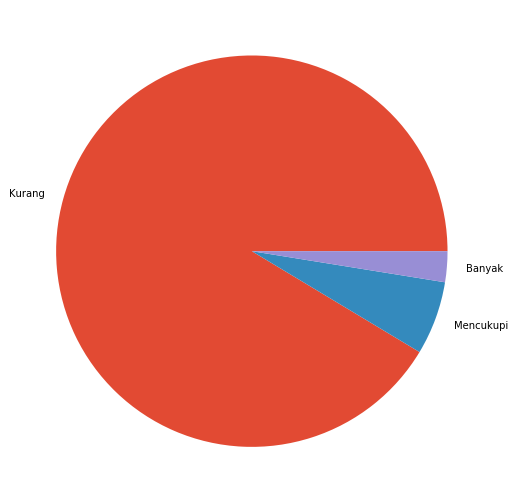

Presentase :
Kurang : 91.38%
Mencukupi : 6.08%
Banyak : 2.54%


In [25]:
x = np.array(penyebaranSMK['Label'])
kurang = 0
cukup = 0
banyak = 0
for i in x :
    if(i == 'Kurang'):
        kurang += 1;
    elif(i == 'Mencukupi'):
        cukup += 1;
    else:
        banyak += 1;
        

persentaseSMK = [kurang, cukup, banyak]
label = ['Kurang', 'Mencukupi', 'Banyak']
total = kurang + cukup + banyak
kurang = "Kurang : " + str(round(((kurang/total)*100),2)) + "%"
cukup = "Mencukupi : "+ str(round(((cukup/total)*100),2)) + "%"
banyak = "Banyak : " + str(round(((banyak/total)*100),2)) + "%"


print("Penyebaran Sekolah SMK Negeri dan Swasta di Indonesia : ")
plt.pie(persentaseSMK, labels=label)
plt.show()
print("Presentase :")
print(kurang)
print(cukup)
print(banyak)

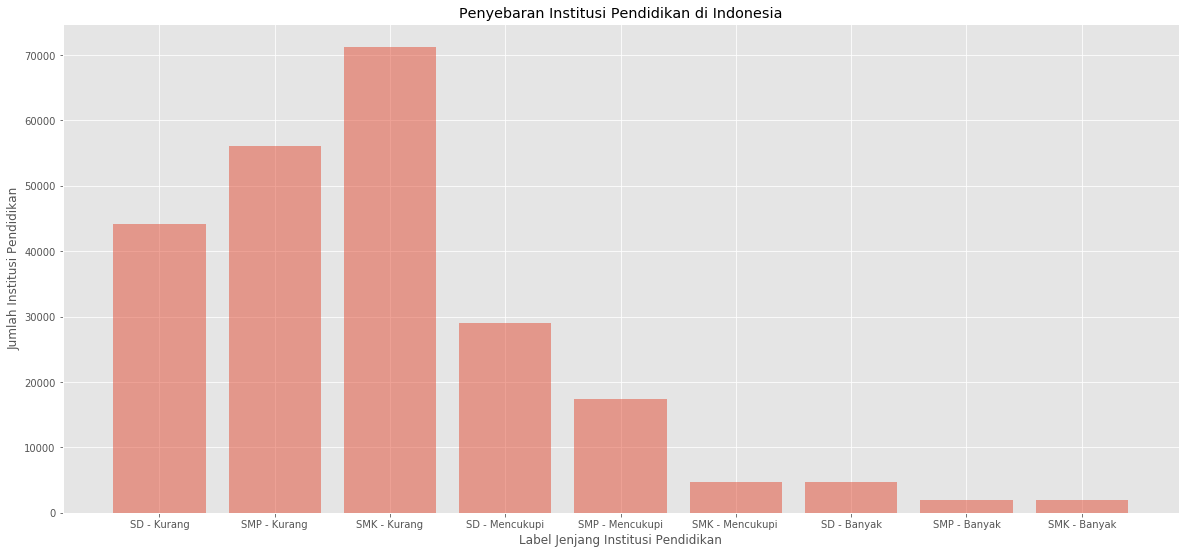

In [26]:
labels = ["SD - Kurang","SMP - Kurang","SMK - Kurang","SD - Mencukupi","SMP - Mencukupi","SMK - Mencukupi ",
          "SD - Banyak","SMP - Banyak","SMK - Banyak"]
persentaseAll = persentaseSD + persentaseSMP + persentaseSMK
persentaseAll = [round(((x/77961)*100),2) for x in persentaseAll]
stringPersentaseAll = [str(x) + '%' for x in persentaseAll]

persentaseAll = pd.DataFrame({"SD": stringPersentaseAll[0:3], "SMP": stringPersentaseAll[3:6], 
                              "SMK": stringPersentaseAll[6:9], "Label":label})
persentaseAll.head()

hasilAkhir = [persentaseSD[0],persentaseSMP[0], persentaseSMK[0], persentaseSD[1], persentaseSMP[1], persentaseSMK[1],
             persentaseSD[2], persentaseSMK[2], persentaseSMK[2]]
plt.rcParams['figure.figsize'] = (20, 9)
plt.bar(labels, hasilAkhir, align='center', alpha=0.5)
plt.ylabel('Jumlah Institusi Pendidikan')
plt.xlabel('Label Jenjang Institusi Pendidikan')
plt.title('Penyebaran Institusi Pendidikan di Indonesia')
plt.show()

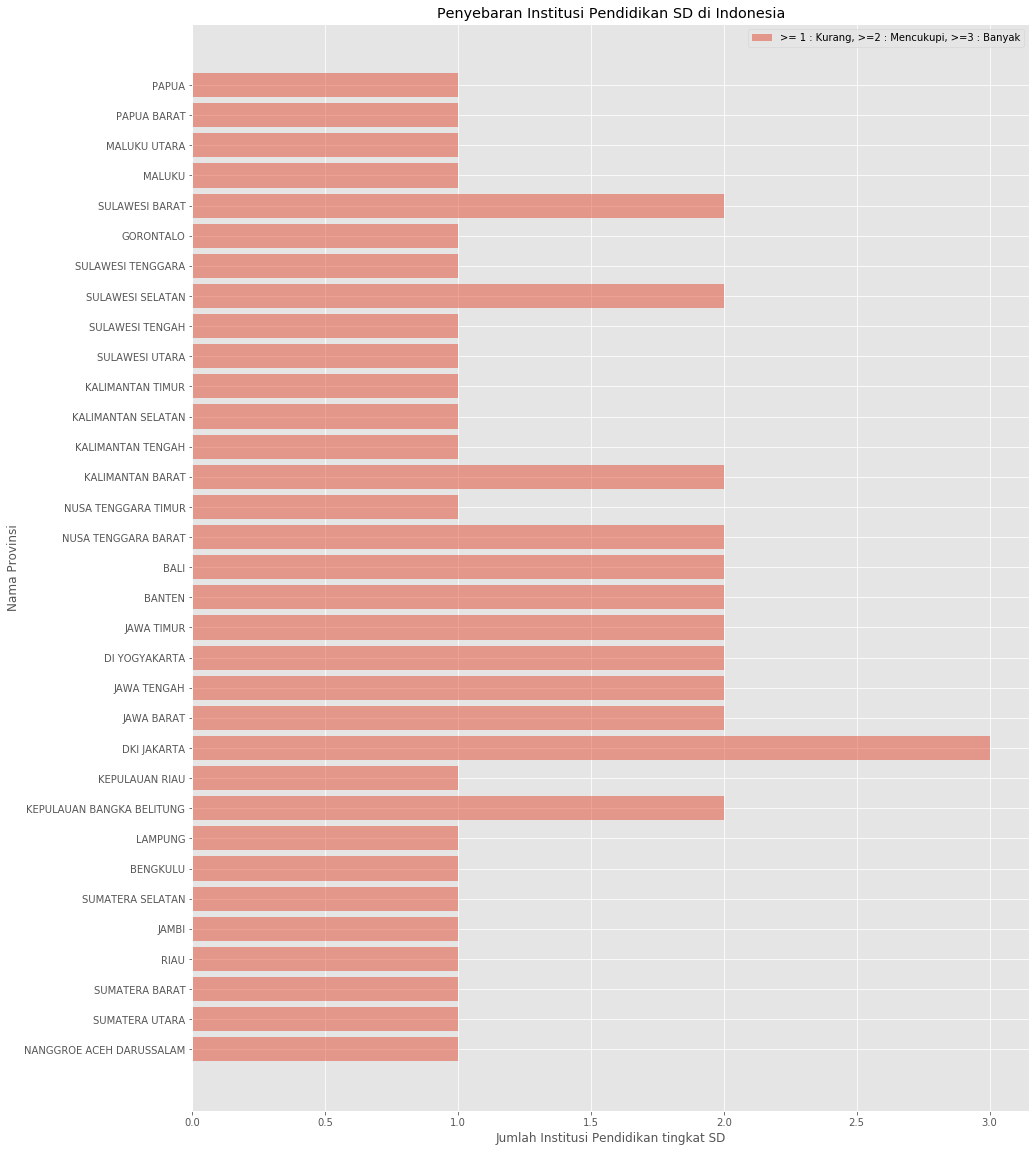

In [148]:
sdProv = penyebaranSD[['KODE_PROV', 'NAMA_PROV', 'Label']]
kode = range(11,95)
hasilSD = []
provinsiSD = []

for i in kode:
    labelProv = sdProv['Label'].where(df['KODE_PROV'] == i).dropna()
    kodeProv = df['NAMA_PROV'].where(df['KODE_PROV'] == i).dropna()
    
    y = np.array(labelProv)
    z = np.array(kodeProv)
    
    kurang = 0
    mencukupi = 0
    banyak = 0
    
    kurang = np.count_nonzero(y == "Kurang")
    mencukupi = np.count_nonzero(y == "Mencukupi")
    banyak = np.count_nonzero(y == "Banyak")
    
    temp = []
    temp.append(kurang)
    temp.append(mencukupi)
    temp.append(banyak)
    #print(y)
    
    if(np.any(temp)):
        temp1 = temp.index(max(temp)) 
        hasilSD.append(temp1 + 1)
        provinsiSD.append(z[0])

plt.rcParams['figure.figsize'] = (15, 20)
plt.barh(provinsiSD, hasilSD, align='center', alpha=0.5, label=">= 1 : Kurang, >=2 : Mencukupi, >=3 : Banyak")
plt.ylabel('Nama Provinsi')
plt.xlabel('Jumlah Institusi Pendidikan tingkat SD')
plt.title('Penyebaran Institusi Pendidikan SD di Indonesia')
plt.legend()
plt.show()

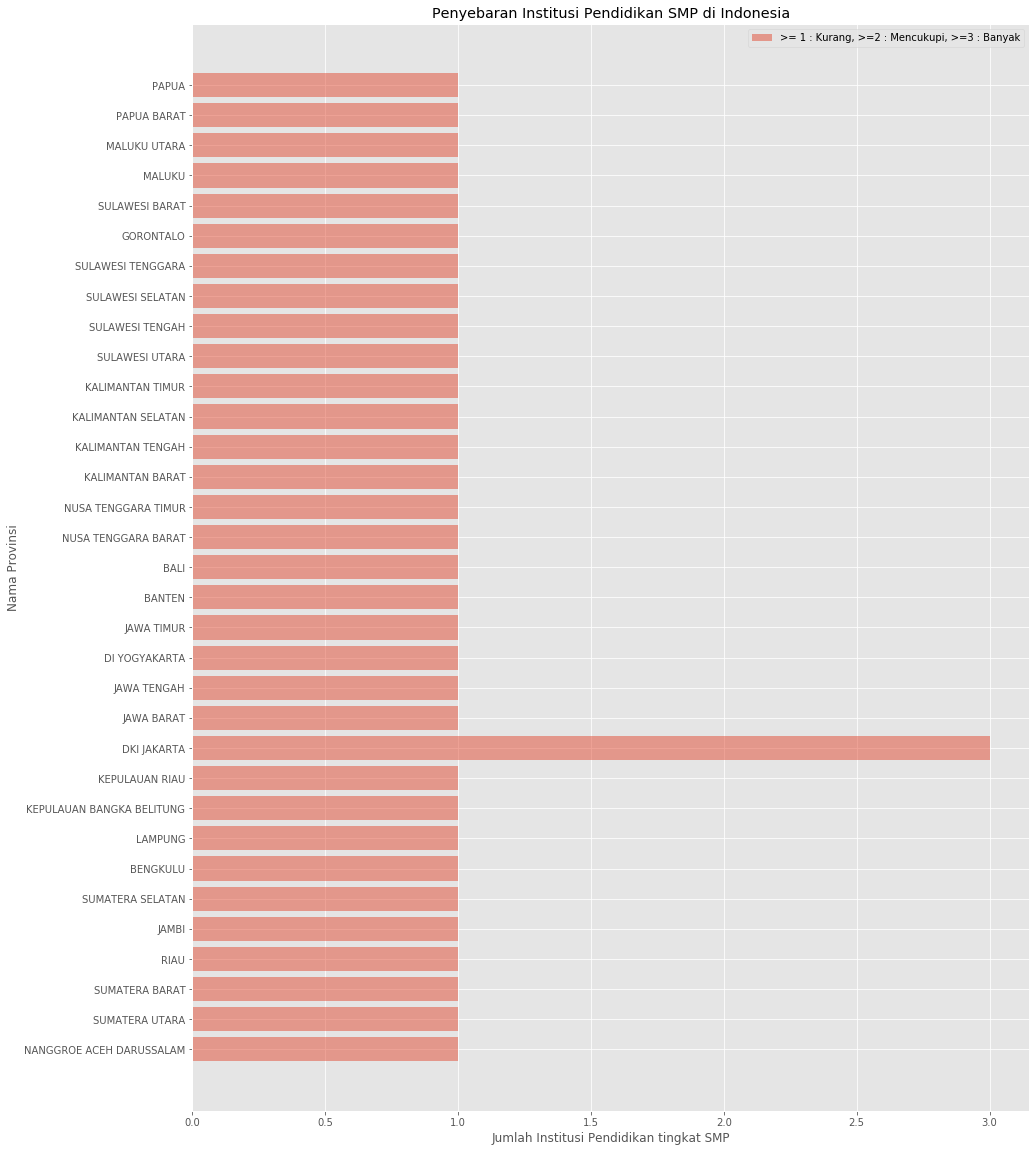

In [154]:
smpProv = penyebaranSMP[['KODE_PROV', 'NAMA_PROV', 'Label']]
kode = range(11,95)
hasilSMP = []
provinsiSMP = []

for i in kode:
    labelProv = smpProv['Label'].where(df['KODE_PROV'] == i).dropna()
    kodeProv = df['NAMA_PROV'].where(df['KODE_PROV'] == i).dropna()
    
    y = np.array(labelProv)
    z = np.array(kodeProv)
    
    kurang = 0
    mencukupi = 0
    banyak = 0
    
    kurang = np.count_nonzero(y == "Kurang")
    mencukupi = np.count_nonzero(y == "Mencukupi")
    banyak = np.count_nonzero(y == "Banyak")
    
    temp = []
    temp.append(kurang)
    temp.append(mencukupi)
    temp.append(banyak)
    #print(y)
    
    if(np.any(temp)):
        temp1 = temp.index(max(temp)) 
        hasilSMP.append(temp1 + 1)
        provinsiSMP.append(z[0])

plt.rcParams['figure.figsize'] = (15, 20)
plt.barh(provinsiSMP, hasilSMP, align='center', alpha=0.5, label=">= 1 : Kurang, >=2 : Mencukupi, >=3 : Banyak")
plt.ylabel('Nama Provinsi')
plt.xlabel('Jumlah Institusi Pendidikan tingkat SMP')
plt.title('Penyebaran Institusi Pendidikan SMP di Indonesia')
plt.legend()
plt.show()

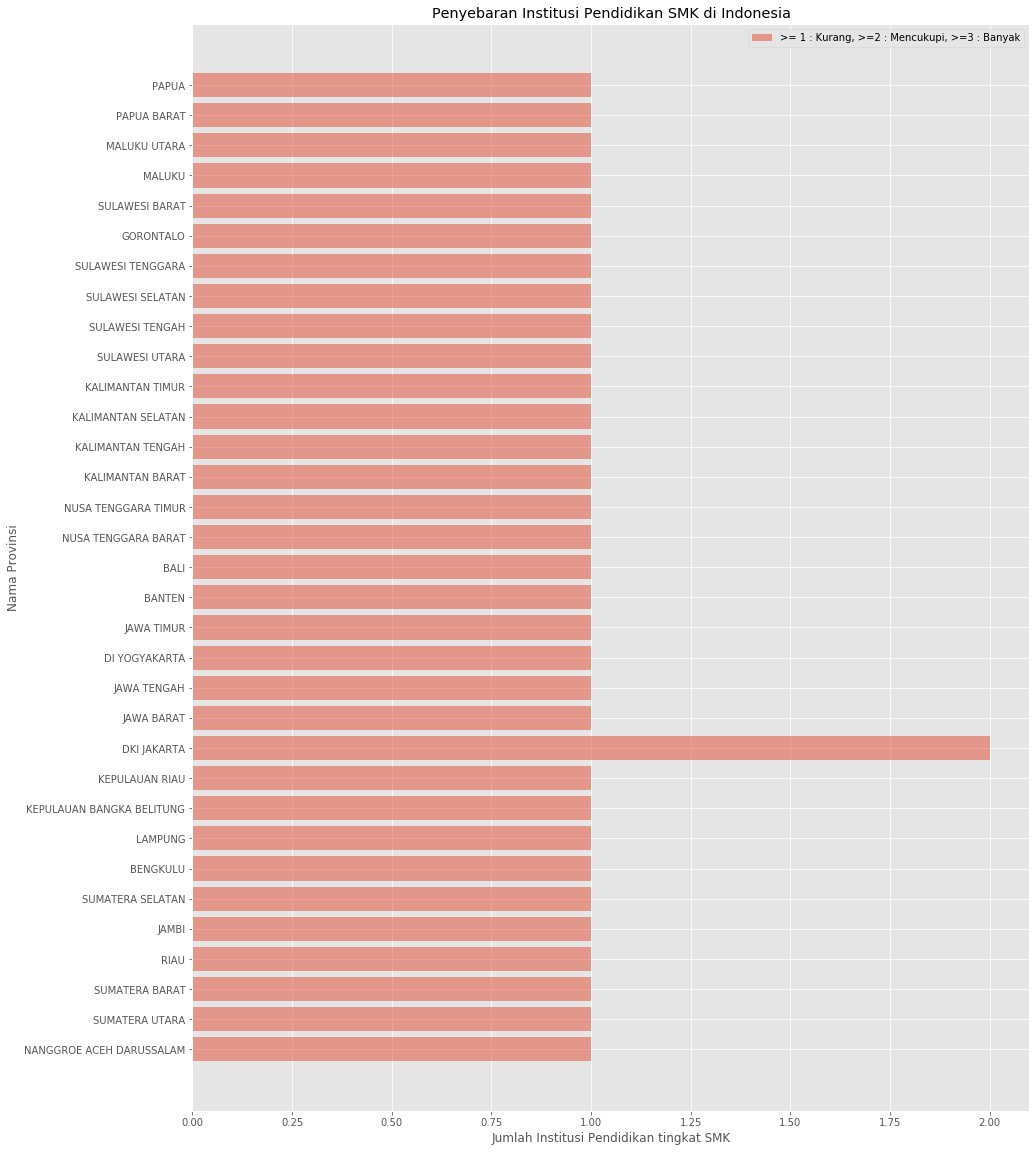

In [153]:
smkProv = penyebaranSMK[['KODE_PROV', 'NAMA_PROV', 'Label']]
kode = range(11,95)
hasilSMK = []
provinsiSMK = []

for i in kode:
    labelProv = smkProv['Label'].where(df['KODE_PROV'] == i).dropna()
    kodeProv = df['NAMA_PROV'].where(df['KODE_PROV'] == i).dropna()
    
    y = np.array(labelProv)
    z = np.array(kodeProv)
    
    kurang = 0
    mencukupi = 0
    banyak = 0
    
    kurang = np.count_nonzero(y == "Kurang")
    mencukupi = np.count_nonzero(y == "Mencukupi")
    banyak = np.count_nonzero(y == "Banyak")
    
    temp = []
    temp.append(kurang)
    temp.append(mencukupi)
    temp.append(banyak)
    #print(y)
    
    if(np.any(temp)):
        temp1 = temp.index(max(temp)) 
        hasilSMK.append(temp1 + 1)
        provinsiSMK.append(z[0])

plt.rcParams['figure.figsize'] = (15, 20)
plt.barh(provinsiSMK, hasilSMK, align='center', alpha=0.5, label=">= 1 : Kurang, >=2 : Mencukupi, >=3 : Banyak")
plt.ylabel('Nama Provinsi')
plt.xlabel('Jumlah Institusi Pendidikan tingkat SMK')
plt.title('Penyebaran Institusi Pendidikan SMK di Indonesia')
plt.legend()
plt.show()